In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import h5py
import numpy as np

In [12]:
allDenoisedImages = sorted(glob("/scratch/mrphys/denoised/*"))
allOrginalImages = sorted(glob("/study/mrphys/skunkworks/training_data/mover01/*/processed_data/C.h5"))
allNoisyImages = sorted(glob("/study/mrphys/skunkworks/training_data/mover01/*/processed_data/acc_2min/C.h5"))

In [13]:
allNoisyImages[40]

'/study/mrphys/skunkworks/training_data/mover01/M045/processed_data/acc_2min/C.h5'

In [14]:
allDenoisedImages[40]

'/scratch/mrphys/denoised/denoised_M045.h5'

In [15]:
allOrginalImages[40]

'/study/mrphys/skunkworks/training_data/mover01/M045/processed_data/C.h5'

In [21]:
def getSubject(j):
    with h5py.File(allDenoisedImages[j],'r') as hf:
        prefix = 'C_000_0'
        denoisedImagestackReal = []
        denoisedImagestackImag = []
        for i in range(6):
            n = prefix + str(i).zfill(2)
            image = hf['Images'][n]
            denoisedImagestackReal.append(np.array(image['real']))
            denoisedImagestackImag.append(np.array(image['imag']))
            if i==0:
                normScale = np.max([np.abs(np.array(image['real'])).max(), np.abs(np.array(image['imag'])).max()])
        denoisedImagestackReal = np.array(denoisedImagestackReal)/normScale
        denoisedImagestackImag = np.array(denoisedImagestackImag)/normScale
    with h5py.File(allOrginalImages[j],'r') as hf:
        prefix = 'C_000_0'
        originalImagestackReal = []
        originalIimagestackImag = []
        for i in range(6):
            n = prefix + str(i).zfill(2)
            image = hf['Images'][n]
            originalImagestackReal.append(np.array(image['real']))
            originalIimagestackImag.append(np.array(image['imag']))
            if i==0:
                normScale = np.max([np.abs(np.array(image['real'])).max(), np.abs(np.array(image['imag'])).max()])
        originalImagestackReal = np.array(originalImagestackReal)/normScale
        originalIimagestackImag = np.array(originalIimagestackImag)/normScale
    with h5py.File(allNoisyImages[j],'r') as hf:
        prefix = 'C_000_0'
        noisyImagestackReal = []
        noisyIimagestackImag = []
        for i in range(6):
            n = prefix + str(i).zfill(2)
            image = hf['Images'][n]
            noisyImagestackReal.append(np.array(image['real']))
            noisyIimagestackImag.append(np.array(image['imag']))
            if i==0:
                normScale = np.max([np.abs(np.array(image['real'])).max(), np.abs(np.array(image['imag'])).max()])
        noisyImagestackReal = np.array(noisyImagestackReal)/normScale
        noisyIimagestackImag = np.array(noisyIimagestackImag)/normScale
    
    return denoisedImagestackReal, originalImagestackReal, noisyImagestackReal

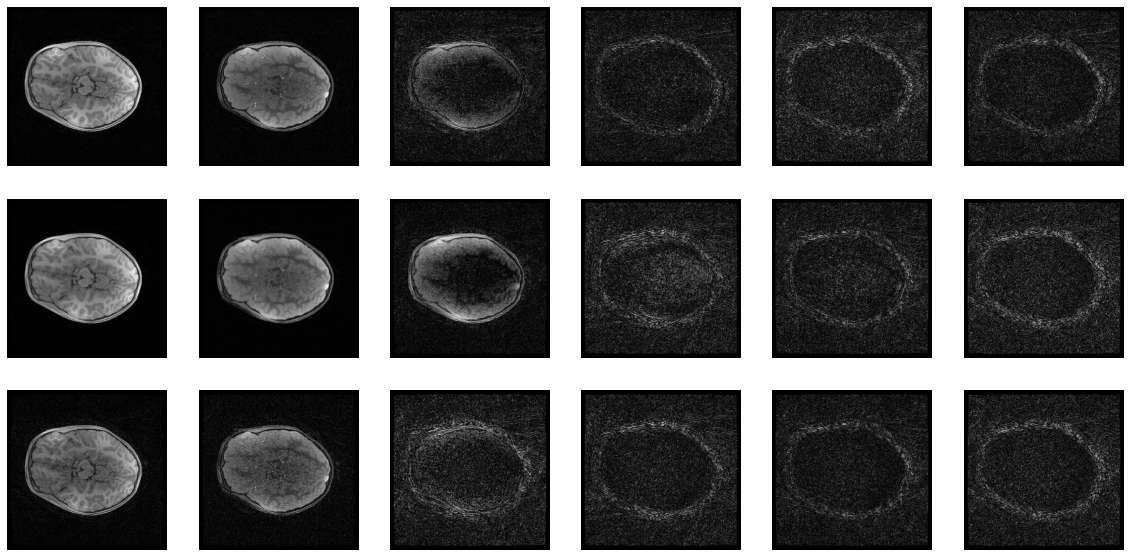

In [22]:
denoisedImagestackReal, originalImagestackReal, noisyImagestackReal = getSubject(0)
fig, ax = plt.subplots(3,6,figsize=(20,10))
plt.gray()
for i in range(6):
    ax[0, i].axis('off')
    ax[0, i].imshow(np.abs(originalImagestackReal[i, 128]))
    # ax[0].set_title("Full Scan")
    ax[1, i].axis('off')
    ax[1, i].imshow(np.abs(denoisedImagestackReal[i, 128]))
    # ax[1].set_title("Denoised or Predict")
    ax[2, i].axis('off')
    ax[2, i].imshow(np.abs(noisyImagestackReal[i, 128]))
    # ax[2].set_title("2 min")

plt.show()

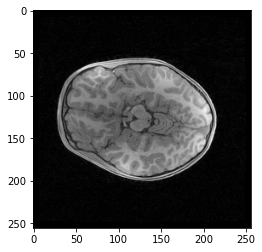

In [23]:
plt.gray()
plt.imshow(np.abs(originalImagestackReal[0, 128]))
plt.show()

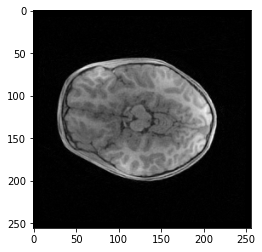

In [24]:
plt.gray()
plt.imshow(np.abs(denoisedImagestackReal[0, 128]))
plt.show()

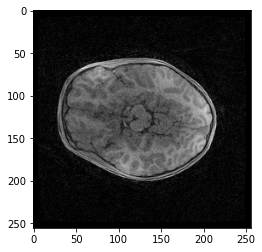

In [25]:
plt.gray()
plt.imshow(np.abs(noisyImagestackReal[0, 128]))
plt.show()